In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

No: row number

year: year of data in this row

month: month of data in this row

day: day of data in this row

hour: hour of data in this row

season: season of data in this row

PM: PM2.5 concentration (ug/m^3)

DEWP: Dew Point (Celsius Degree)

TEMP: Temperature (Celsius Degree)

HUMI: Humidity (%)

PRES: Pressure (hPa)

cbwd: Combined wind direction

Iws: Cumulated wind speed (m/s)

precipitation: hourly precipitation (mm)

Iprec: Cumulated precipitation (mm)

In [2]:
data = pd.read_csv('Shanghai_HMT_2010.csv')

In [3]:
print("data.shape = ", data.shape)
data.head(10)

data.shape =  (52584, 17)


,No,year,month,day,hour,season,PM_Jingan,PM_US Post,PM_Xuhui,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,-6.0,63.94,1024.0,0.0,SE,5.0,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,-6.0,63.94,1023.0,0.0,SE,8.0,0.0,0.0
5,6,2010,1,1,5,4,NaN,NaN,NaN,-7.0,59.21,1023.0,0.0,SE,11.0,0.0,0.0
6,7,2010,1,1,6,4,NaN,NaN,NaN,-6.0,59.48,1023.0,1.0,SE,14.0,0.0,0.0
7,8,2010,1,1,7,4,NaN,NaN,NaN,-5.0,64.18,1023.0,1.0,SE,17.0,0.0,0.0
8,9,2010,1,1,8,4,NaN,NaN,NaN,-3.0,69.43,1023.0,2.0,SE,20.0,0.0,0.0
9,10,2010,1,1,9,4,NaN,NaN,NaN,-2.0,64.90,1023.0,4.0,SE,23.0,0.0,0.0


In [4]:
data = data.drop(['PM_Jingan','PM_US Post','PM_Xuhui'],axis=1).dropna()

In [5]:
print("data.shape = ", data.shape)
data.head(10)

data.shape =  (48549, 14)


,No,year,month,day,hour,season,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,-6.0,59.48,1026.1,1.0,cv,1.0,0.0,0.0
1,2,2010,1,1,1,4,-6.0,59.48,1025.1,1.0,SE,2.0,0.0,0.0
2,3,2010,1,1,2,4,-7.0,59.21,1025.1,0.0,SE,4.0,0.0,0.0
3,4,2010,1,1,3,4,-6.0,63.94,1024.0,0.0,SE,5.0,0.0,0.0
4,5,2010,1,1,4,4,-6.0,63.94,1023.0,0.0,SE,8.0,0.0,0.0
5,6,2010,1,1,5,4,-7.0,59.21,1023.0,0.0,SE,11.0,0.0,0.0
6,7,2010,1,1,6,4,-6.0,59.48,1023.0,1.0,SE,14.0,0.0,0.0
7,8,2010,1,1,7,4,-5.0,64.18,1023.0,1.0,SE,17.0,0.0,0.0
8,9,2010,1,1,8,4,-3.0,69.43,1023.0,2.0,SE,20.0,0.0,0.0
9,10,2010,1,1,9,4,-2.0,64.90,1023.0,4.0,SE,23.0,0.0,0.0


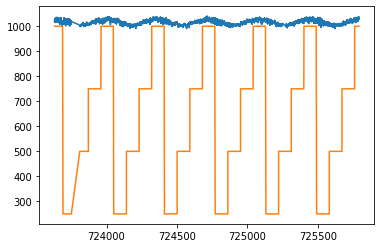

In [6]:
plt.plot((data['year']*12+data['month'])*30+data['day'],data[['PRES','season']]*[1,250])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, explained_variance_score

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data[['HUMI','TEMP']], data['PRES'], test_size=0.2)

In [9]:
model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [10]:
y_test2 = y_test

In [11]:
np.array(y_test)- predictions

array([-6.42516521,  7.03749341,  2.53925225, ..., -0.08533502,
        0.92848152, -4.02096635])

In [12]:
mse(predictions, y_test)

18.928171986131954

Попробуем с нормализованными данными

In [13]:
data = ((data - data.mean())/data.std()).dropna(axis=1)

C:\Users\battl\AppData\Local\Temp/ipykernel_8644/813400618.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data = ((data - data.mean())/data.std()).dropna(axis=1)


In [14]:
data.head(10)

,DEWP,HUMI,Iprec,Iws,No,PRES,TEMP,day,hour,month,precipitation,season,year
0,-1.697416,-0.542800,-0.141337,-0.628298,-1.798378,1.081375,-1.716469,-1.674715,-1.676968,-1.557591,-0.132726,1.308765,-1.511622
1,-1.697416,-0.542800,-0.141337,-0.615765,-1.798310,0.970097,-1.716469,-1.674715,-1.531780,-1.557591,-0.132726,1.308765,-1.511622
2,-1.798101,-0.558044,-0.141337,-0.590698,-1.798241,0.970097,-1.822898,-1.674715,-1.386591,-1.557591,-0.132726,1.308765,-1.511622
3,-1.697416,-0.290993,-0.141337,-0.578165,-1.798173,0.847690,-1.822898,-1.674715,-1.241402,-1.557591,-0.132726,1.308765,-1.511622
4,-1.697416,-0.290993,-0.141337,-0.540566,-1.798104,0.736412,-1.822898,-1.674715,-1.096214,-1.557591,-0.132726,1.308765,-1.511622
5,-1.798101,-0.558044,-0.141337,-0.502966,-1.798036,0.736412,-1.822898,-1.674715,-0.951025,-1.557591,-0.132726,1.308765,-1.511622
6,-1.697416,-0.542800,-0.141337,-0.465367,-1.797967,0.736412,-1.716469,-1.674715,-0.805836,-1.557591,-0.132726,1.308765,-1.511622
7,-1.596731,-0.277443,-0.141337,-0.427767,-1.797899,0.736412,-1.716469,-1.674715,-0.660648,-1.557591,-0.132726,1.308765,-1.511622
8,-1.395360,0.018966,-0.141337,-0.390168,-1.797830,0.736412,-1.610039,-1.674715,-0.515459,-1.557591,-0.132726,1.308765,-1.511622
9,-1.294675,-0.236793,-0.141337,-0.352568,-1.797762,0.736412,-1.397180,-1.674715,-0.370270,-1.557591,-0.132726,1.308765,-1.511622


In [15]:
X_train, X_test, y_train, y_test = train_test_split(data[['HUMI','TEMP']], data['PRES'], test_size=0.2)

model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [16]:
np.array(y_test)- predictions

array([ 0.19768382,  0.00943259,  0.25060895, ..., -0.01676901,
        0.29059606, -0.5085912 ])

In [17]:
mse(predictions, y_test)

0.23052411464624348

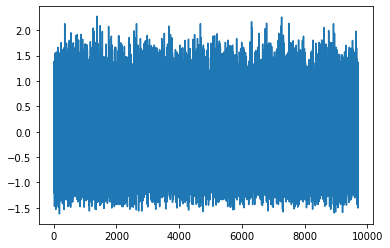

In [18]:
plt.plot(predictions) #todo: денормализовать полученный результат...

а теперь добавим остальные колонки

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('PRES',axis=1), data['PRES'], test_size=0.2)

model = LinearRegression()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [22]:
np.array(y_test)- predictions

array([-0.31753078, -0.39155736, -0.17092829, ...,  0.20473515,
       -0.52438677, -0.36532554])

In [23]:
mse(predictions, y_test)

0.19502359628992494

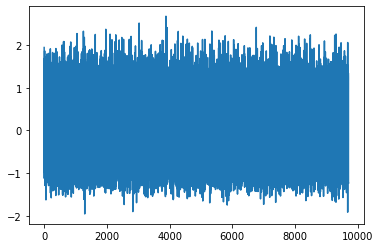

In [24]:
plt.plot(predictions) #todo: денормализовать полученный результат...